# Project: Predicting no-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">A. Introduction</a></li>
<li><a href="#wrangling">B. Data Wrangling</a></li>
<li><a href="#eda">C. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">D. Conclusions</a></li>
</ul>

<a id='intro'></a>
## A. Introduction

### Data Analysis Nanodegree: Project 2 - Investigate a dataset

This project is completed as part of the 'Data Analyst' nanodegree with Udacity. The dataset, provided by Kaggle, collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

The goal of the project was to demonstrate data analysis skills of questioning, wrangling, exploring, analysing and communicating data using numpy, pandas and matplotlib libararies.


### Data

Data were supplied by Kaggle through Udacity and can be downloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv).

Read more information about the features directly in 
Kaggle [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

The data contain 14 features:

**1) PatientId:** Identification of a patient

**2) AppointmentID:** Identification of each appointment, which is unique in this dataset. Each row is one appointment

**3) Gender:** Male (M) or Female (F).  
Female is the greater proportion, woman takes way more care of they health in comparison to man.

**4) ScheduledDay:** The date and time the patient setup their appointment

**5) AppointmentDay:** The date of the actual appointment (no time is present)

**6) Age:** How old is the patient.

**7) Neighbourhood:** Location of the hospital where the appointment takes place

**8) Scholarship:** True (1) of False (0).

Indicates whether or not the patient is enrolled in Brasilian welfare program.
Read more about the [Bolsa Família here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

**9) Hipertension:** True (1) or False (0)

Also known as high blood pressure

**10) Diabetes:** True (1) or False (0)

**11) Alcoholism:** True (1) or False (0)

**12) Handcap:** Values 0 - 4

- conflicting information about this feature exist on kaggle, it was interpreted as:
    - 0 means patient have no disabilitly, 1 means patient 1 disability, 2 means patient have 2 disabilities, 3 means patient have 3 disabilities and so on

**13) SMS_received:** True (1) or False (0)

- 1 or more messages were sent to the patient

**14) No-show:** True (1) or False (0)

- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### The project will answer the following questions:

1) Does patient noshows increase when the waiting time for the appointment increase ?

2) Do no show's occur more on specific weekdays ?    

3) Which features are the most important to predict if a patient will show up for their scheduled appointment?

4) Which age group are most likely to not show up?

5) Are no shows related to certain hospitals ?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# import custom functions that generate visualizations for repetitive code
from src.helpers import *

%matplotlib inline
sns.set(style='white', font_scale=1)

# suppress matplotlib user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

<a id='wrangling'></a>
## B. Data Wrangling


### B.1 General Properties

In [2]:
# Load data
df_patients = pd.read_csv('../data/noshowappointments_kagglev2_may_2016.csv')
df_patients.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# how many rows and colums does the dataset have ?
df_patients.shape

(110527, 14)

In [4]:
# which datatypes does the dataset have, and how many missing values can observed ?
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values, and a mixture of strings, integers and floats data types are present
It's strange by first observation that a 'PatientId' which looks like keys, is of type float, this needs to be changed to integer

In [5]:
# how manu unique values does each column of the dataset have ?
df_patients.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can clearly observe that appointment id is a unique key as it has the same number of records as the dataset. We can see each patient can have more than one appointment if we compare unique values in patients with unique values in appointment id

Age have a lot of unique values, it might make sense to introduce a new age interval variable that is more condensed

In [6]:
# show unique values for some columns
print('\nUNIQUE VALUES FOR COLUMNS: \n')
for col in df_patients.columns:
    if df_patients[col].nunique() < 200:
        print('Unique values for column {}: \n {} \n'.format(col, df_patients[col].sort_values().unique()))


UNIQUE VALUES FOR COLUMNS: 

Unique values for column Gender: 
 ['F' 'M'] 

Unique values for column AppointmentDay: 
 ['2016-04-29T00:00:00Z' '2016-05-02T00:00:00Z' '2016-05-03T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-05T00:00:00Z' '2016-05-06T00:00:00Z'
 '2016-05-09T00:00:00Z' '2016-05-10T00:00:00Z' '2016-05-11T00:00:00Z'
 '2016-05-12T00:00:00Z' '2016-05-13T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-05-16T00:00:00Z' '2016-05-17T00:00:00Z' '2016-05-18T00:00:00Z'
 '2016-05-19T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-24T00:00:00Z'
 '2016-05-25T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-06-01T00:00:00Z' '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z'
 '2016-06-06T00:00:00Z' '2016-06-07T00:00:00Z' '2016-06-08T00:00:00Z'] 

Unique values for column Age: 
 [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51 

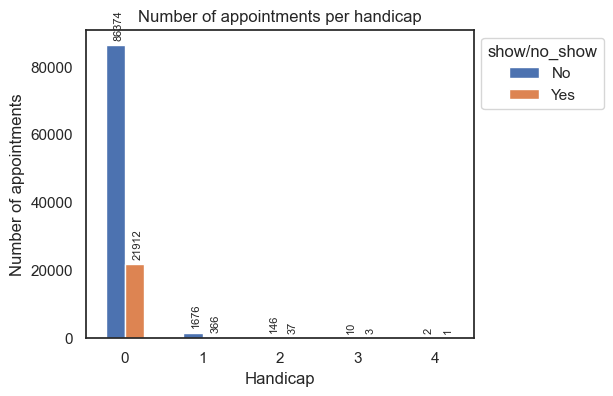

In [7]:
# check if it's worth to convert handicap into a binary indicator, as it's the case with most other features
df_handicap = df_patients.groupby('Handcap')['No-show'].value_counts(normalize=False).unstack()

# plot the handicap distribution
ax = df_handicap.plot(kind='bar', 
                      figsize=(5,4), 
                      xlabel='Handicap', 
                      ylabel='Number of appointments', 
                      rot=0,
                      title='Number of appointments per handicap')

ax.legend(title='show/no_show', bbox_to_anchor=(1, 1), loc='upper left')

# annotate values on top of bar chart
for p in ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() + 0.1
    txt_y = p.get_height() + 2000
    ax.text(txt_x, txt_y, txt, fontsize=8, rotation='vertical')
    
plt.show()

Observations after analyzing unique values of each column: 
- Age: Values like 0, -1, 115 looks like it might be invalid or missing data - to be further analysed
- 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS received' all looks like binary indicators
- No-show: Change to binary indicator 1, 0  as well to fit with other binary columns
- Appointment day: looks like it covers a period of around 1 month
- Scheduled day have lots more unique values compared to appointment day, which suggest some appointment are made very well in advance
- Handcap: As the number of values for handicap 2-4 are so low with very little noshows, turn this feature into a binary

In [8]:
# Are any rows duplicated ?
df_patients.duplicated().sum()

0

No data seems to be duplicated

### B.2 Data Cleaning 

During accessing step, the following cleaning steps were identified:

- 1) Patient Id and Appointment Id are identifiers/keys. Drop this data as it's not needed for the analysis
- 2) Improve column headings 
- 3) Convert ScheduledDay and AppointmentDay to datetime format and drop the time. Appointment day has no time included in the data, therefore the value of time in appointment day is assumed to be of little importance
- 4) Introduce new feature 'time_delay' which are the days passed between making an appointment and the appointment day itself. 
- 5) Introduce new feature 'appointment_dayofweek' which represent the day of the week of the appointment (e.g. Monday vs Friday). 

- 6) No-show: Change to binary indicator 1, 0 as well to fit with other binary columns. '1' means patient did not show up
- 7) Change 'gender' to binary indicator as well using 'get_dummies' function, in order to visualize relationships between other variables better
- 8) Age: Drop age = -1. Analyse values = 0, asssuming these are new born babies. Build subranges and review distributions
- 9) Binarize handicap, as in general there are very little no_shows for increased number of disabilities       

In [9]:
df_patients_clean = df_patients.copy()

##### 1) Patient Id and Appointment Id are identifiers/keys. Drop these columns

In [10]:
df_patients_clean.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

##### 2) Improve column headings
- Change column headers to lowercase
- rename '-' to '_'
- improve descriptions and syntax

In [11]:
# Correct heading names
df_patients_clean.columns = df_patients_clean.columns.str.replace('-', '_')
df_patients_clean.columns = df_patients_clean.columns.str.lower()
df_patients_clean.rename(columns={'scheduledday': 'scheduled_date', 
                                  'appointmentday': 'appointment_date', 
                                  'hipertension': 'hypertension', 
                                  'handcap': 'handicap'},
                          inplace=True)

df_patients_clean.head()    

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### 3) Convert date fields to datetime format
As appointment date has no time present, remove the time also from scheduled date

In [12]:
df_patients_clean['scheduled_date']   = pd.to_datetime(df_patients_clean['scheduled_date']).dt.date.astype('datetime64[ns]')
df_patients_clean['appointment_date'] = pd.to_datetime(df_patients_clean['appointment_date']).dt.date.astype('datetime64[ns]')
df_patients_clean.dtypes

gender                      object
scheduled_date      datetime64[ns]
appointment_date    datetime64[ns]
age                          int64
neighbourhood               object
scholarship                  int64
hypertension                 int64
diabetes                     int64
alcoholism                   int64
handicap                     int64
sms_received                 int64
no_show                     object
dtype: object

##### 4) Add new feature 'time_delay'
This feature will represent the waiting time for appointments, meaning the difference in days when an appointment was made and the actual date of the appointment

In [13]:
# add new feature 'time_delay' (in days) between date making the appointment and appointment day
df_patients_clean['time_delay'] = (df_patients_clean['appointment_date'] - df_patients_clean['scheduled_date']).dt.days
df_patients_clean.head(10)

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2


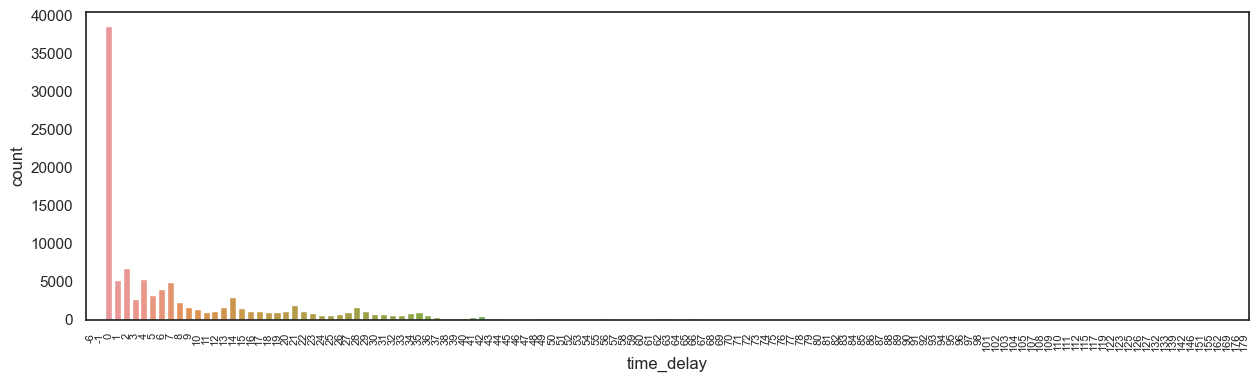

In [14]:
# Inspect distribution of the time delay
fig, ax = plt.subplots(figsize=(15,4))
plt.xticks(fontsize=8, rotation=90)
g = sns.countplot(x='time_delay', data=df_patients_clean, ax=ax);

Notice we get some negative values, lets inspect that further. We can also notice a long right tail with lots of small values. For better analysis it might better to introduce interval ranges instead

In [15]:
# Inspect records causing negative time_delays
df_patients_clean.query('time_delay < 0')

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Negative 'time_delay' is caused when scheduled date < appointmentd date, which seems like errors in the data. Let's drop these records

In [16]:
# delete records where appointment_date < scheduled date
df_patients_clean = df_patients_clean.drop(df_patients_clean.query('time_delay < 0').index)

In [17]:
# Make sure records with negative time delay are now deleted
df_patients_clean.query('time_delay < 0')

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay


In [18]:
# inspect the distribution of time_delay as it seems to have a long right detail with values 0 to 179
perc = df_patients_clean.time_delay.describe()
perc

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: time_delay, dtype: float64

In [19]:
# replace time_delay with range value instead that is build from percentiles to reduce the range of values
bin_edges = [perc['min'], perc['50%'], perc['75%'], perc['max']]
bin_labels = [perc['50%'], perc['75%'], perc['max']]
df_patients_clean['time_delay_ranges'] = pd.cut(df_patients_clean['time_delay'], 
                                         bins=bin_edges,
                                         include_lowest=True,
                                         labels=bin_labels)
df_patients_clean.head()

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4.0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4.0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4.0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4.0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4.0


##### 4) add new feature 'appointment_dayofweek'

In [20]:
# add new feature - the day of the appointment (e.g. Monday, Tuesday)
df_patients_clean['appointment_dayofweek'] = df_patients_clean['appointment_date'].dt.dayofweek
df_patients_clean.head(5)

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4.0,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4.0,4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4.0,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4.0,4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4.0,4


##### 6) Change no_show to a binary indicator (1,0) to match with other features in the dataset

In [21]:
# First, lets count number of No/Yes values before
df_patients_clean['no_show'].value_counts()

No     88208
Yes    22314
Name: no_show, dtype: int64

In [22]:
 # No-show: Change to binary indicator 1, 0 as well to fit with other binary columns
df_patients_clean['no_show'] = df_patients_clean['no_show'].map({'No':0, 'Yes':1})
df_patients_clean['no_show'].value_counts()

0    88208
1    22314
Name: no_show, dtype: int64

In [23]:
df_patients_clean.head()

,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4.0,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4.0,4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4.0,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4.0,4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4.0,4


##### 7) Change 'gender' to a binary indicator (1,0) to make correlation analysis together with other features easier
0 = Female
1 = Male

In [24]:
df_patients_clean = pd.get_dummies(df_patients_clean, columns=['gender'])
df_patients_clean.head()

,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M
0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4.0,4,1,0
1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4.0,4,0,1
2,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4.0,4,1,0
3,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4.0,4,1,0
4,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4.0,4,1,0


##### 8) Age corrections
There seems to be patients with age 0, -1 and over 100 years. Analyse this a bit deeper to access the impact

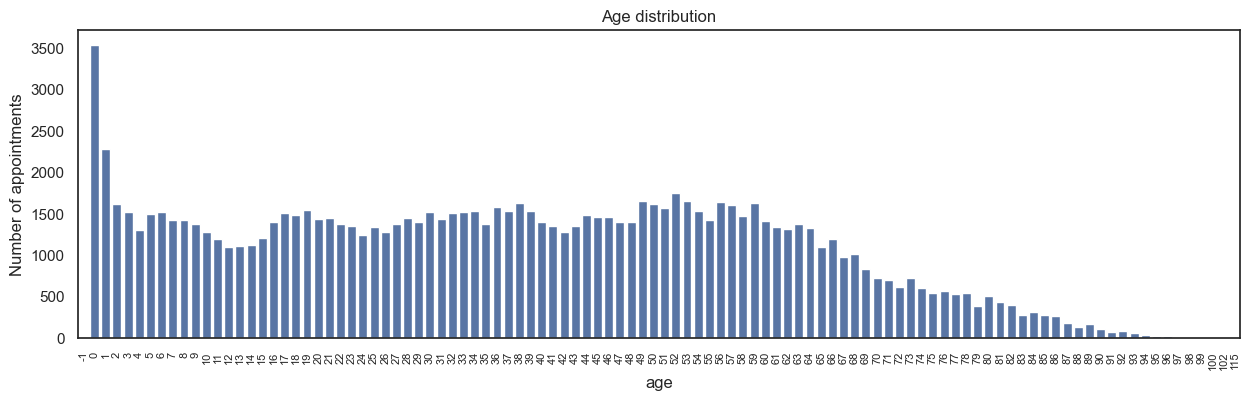

In [25]:
fig, ax = plt.subplots(figsize=(15,4))
plt.xticks(fontsize=8, rotation=90)
g = sns.countplot(x='age', data=df_patients_clean, ax=ax, color='b');
plt.title('Age distribution')
plt.ylabel('Number of appointments')
plt.show()

In [26]:
df_patients_clean['age'].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: age, Length: 104, dtype: int64

3539 patients have age = 0, this a high proportion of the dataset. I assume these are newborn babies

In [27]:
df_patients_clean.query('age == 0').groupby('no_show').sum()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,time_delay,appointment_dayofweek,gender_F,gender_M
no_show,,,,,,,,,,,
0,0,45,0,0,0,1,681,26836,5255,1402.0,1498.0
1,0,7,0,0,0,0,216,11031,1088,319.0,320.0


If patients with age = 0 are newborn babies, we don't expect to see scholorships or handicaps, these records looks like errors and should be deleted

In [28]:
# double check number of records before we delete invalid records
records_before = df_patients_clean.shape[0]
records_before

110522

In [29]:
# drop and make sure only 52 records was dropped
df_patients_clean = df_patients_clean.drop(df_patients_clean.query('age == 0 & scholarship > 0').index)
print('Number of records dropped: {}'.format(records_before - df_patients_clean.shape[0]))

Number of records dropped: 52


In [30]:
# drop record were age is -1 and make sure in total we dropped only 53 records
df_patients_clean = df_patients_clean.drop(df_patients_clean.query('age == -1').index)
print('Number of records dropped: {}'.format(records_before - df_patients_clean.shape[0]))

Number of records dropped: 53


In [31]:
# Age have over 100 unique entries. Let's build age sub ranges to condense and improve visualizations
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
bin_labels = [10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
df_patients_clean['age_ranges'] = pd.cut(df_patients_clean['age'], 
                                         bins=bin_edges,
                                         include_lowest=True,
                                         labels=bin_labels)
df_patients_clean.head()

,scheduled_date,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M,age_ranges
0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4.0,4,1,0,70
1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4.0,4,0,1,60
2,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4.0,4,1,0,70
3,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4.0,4,1,0,10
4,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4.0,4,1,0,60


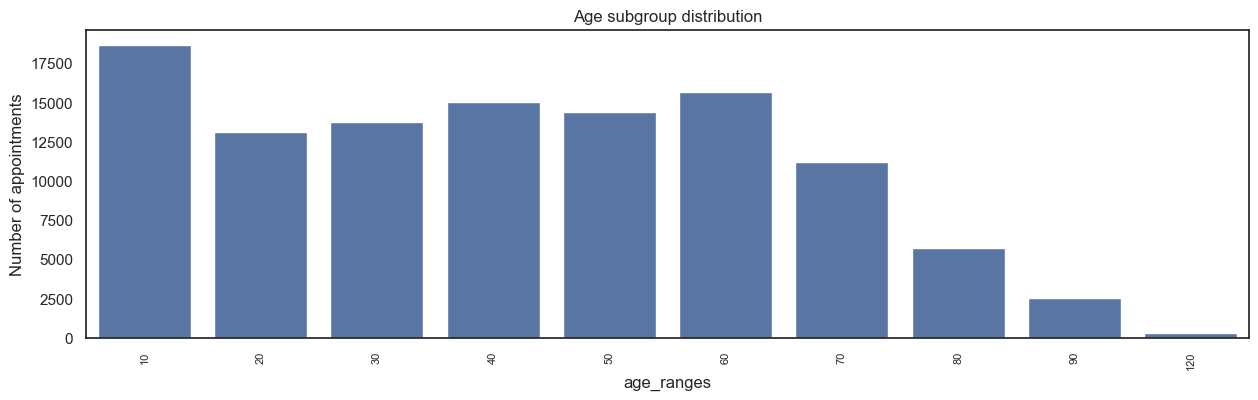

In [32]:
fig, ax = plt.subplots(figsize=(15,4))
plt.xticks(fontsize=8, rotation=90)
g = sns.countplot(x='age_ranges', data=df_patients_clean, ax=ax, color='b');
plt.title('Age subgroup distribution')
plt.ylabel('Number of appointments')
plt.show()

It is now much easier to compare age groups:
- The age range with the most patients are very young 0-10 years old.
- Most patients are < 70 years old
- There are only few patients > 80 years

#### 9) Convert handicap to binary indicator

In [33]:
 # Convert handicap into a binary indicator, 0 means disabilities, 1 means disability is present
df_patients_clean['handicap'] = df_patients_clean['handicap'].map({0:0, 1:1, 2:1, 3:1, 4:1})
df_patients_clean['handicap'].value_counts()

0    108230
1      2239
Name: handicap, dtype: int64

### Save cleaned dataset

In [34]:
# final check
df_patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110469 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   scheduled_date         110469 non-null  datetime64[ns]
 1   appointment_date       110469 non-null  datetime64[ns]
 2   age                    110469 non-null  int64         
 3   neighbourhood          110469 non-null  object        
 4   scholarship            110469 non-null  int64         
 5   hypertension           110469 non-null  int64         
 6   diabetes               110469 non-null  int64         
 7   alcoholism             110469 non-null  int64         
 8   handicap               110469 non-null  int64         
 9   sms_received           110469 non-null  int64         
 10  no_show                110469 non-null  int64         
 11  time_delay             110469 non-null  int64         
 12  time_delay_ranges      110469 non-null  cate

In [35]:
# write cleaned dataset to csv
df_patients_clean.to_csv('../data/noshowappointments_kagglev2_may_2016_cleaned.csv')

<a id='eda'></a>
## C. Exploratory Data Analysis


In [36]:
# read the cleaned data from csv
df_patients_clean = pd.read_csv('../data/noshowappointments_kagglev2_may_2016_cleaned.csv', index_col=[0,1])
df_patients_clean.head()

,,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M,age_ranges
,scheduled_date,,,,,,,,,,,,,,,,
0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4.0,4,1,0,70
1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4.0,4,0,1,60
2,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4.0,4,1,0,70
3,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4.0,4,1,0,10
4,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4.0,4,1,0,60


#### First impressions

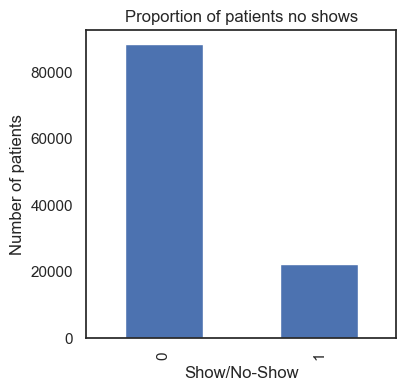

In [37]:
# what is the proportion of patients showing up vs no show ?
df_patients_clean['no_show'].value_counts().plot(kind='bar', 
                                                 xlabel='Show/No-Show', 
                                                 ylabel='Number of patients',
                                                 title='Proportion of patients no shows',
                                                 figsize=(4, 4));

In [38]:
prop = df_patients_clean['no_show'].value_counts(normalize=True) * 100
print('{}% of patients do not show up for their appointments'.format(round(prop[1],2)))

20.19% of patients do not show up for their appointments


In [39]:
# get descriptive statistics for the cleaned dataset with extra features included
df_patients_clean.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M,age_ranges
count,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000,110469.000000
mean,37.106844,0.097846,0.197349,0.071903,0.030416,0.020268,0.321095,0.201930,10.185292,48.124261,1.858458,0.650038,0.349962,41.928686
std,23.101306,0.297108,0.398000,0.258328,0.171729,0.140917,0.466899,0.401442,15.256860,73.175230,1.371709,0.476960,0.476960,22.971271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,10.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,20.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,2.000000,1.000000,0.000000,40.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,15.000000,3.000000,1.000000,1.000000,60.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,179.000000,5.000000,1.000000,1.000000,120.000000


**Observations:**
- Patients are younger with mean age of 37
- Not a lot of patients have deceases like hypertension (<20%), diabetes(<7%), alcoholism(<3%) and disabilities (<15%)
- 10% patients receive goverment grants/scholarship
- 20% of patients do not show up
- Average time delay for appointments is 10 days, whilst 50% of patients wait <= 4 days
- We have 65% female patients and 35% male patients

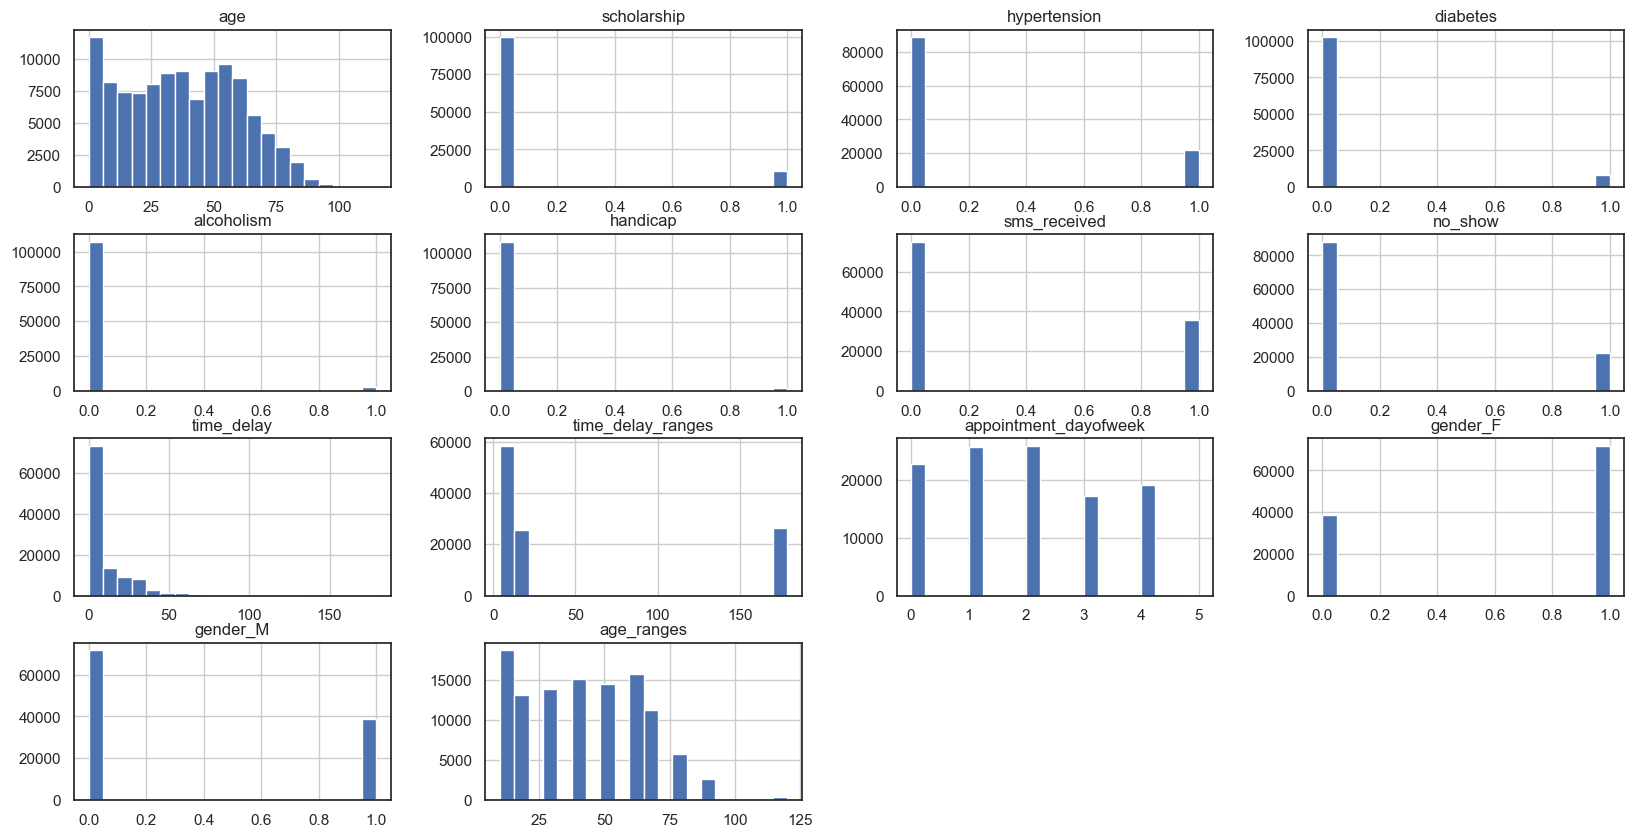

In [40]:
# get a general idea of feature distributions
pd.plotting.hist_frame(df_patients_clean, figsize=(20,10), bins=20);

<a id='eda'></a>

### Research Question 1
### C.1 Does patient noshows increase when the waiting time for the appointment increase ?

Inspect the relationship between time delay ranges and patients shows vs noshows

In [41]:
# build labels of each time delay interval using percentiles
perc = df_patients_clean.time_delay.describe()
bin_edges = [perc['min'], perc['50%'], perc['75%'], perc['max']]
label1 = ('{} to {} days'.format(int(bin_edges[0]), int(bin_edges[1])))
label2 = ('{} to {} days'.format(int(bin_edges[1]) + 1, int(bin_edges[2])))
label3 = ('{} to {} days'.format(int(bin_edges[2]) + 1, int(bin_edges[3])))
bin_labels = [label1, label2, label3]
bin_labels

['0 to 4 days', '5 to 15 days', '16 to 179 days']

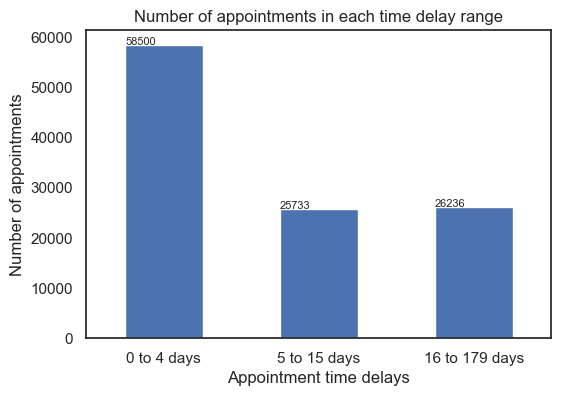

In [42]:
# Plot the number of patients in each time delay range
delay_range = df_patients_clean.groupby(['time_delay_ranges']).size()

ax = delay_range.plot(kind='bar', 
                      figsize=(6, 4), 
                      xlabel='Appointment time delays', 
                      ylabel='Number of appointments', 
                      rot=0,
                      title='Number of appointments in each time delay range')

ax.set_xticklabels(bin_labels)

# annotate values on top of bar chart
for p in ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x()
    txt_y = p.get_height()
    ax.text(txt_x, txt_y, txt, fontsize=8)
    
plt.show()

Around 50% of patients wait for appointments 5 days or longer

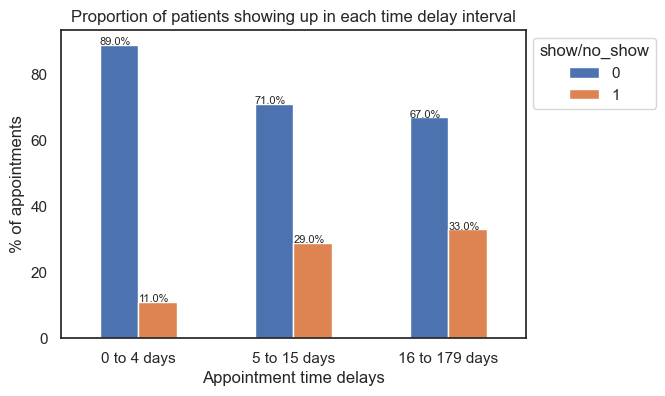

In [43]:
# Plot patient show/no show proportions in each time delay interval
delay_range_prop = df_patients_clean.groupby(['time_delay_ranges'])['no_show'].value_counts(normalize=True).unstack()
delay_range_prop = round(delay_range_prop.mul(100))

ax = delay_range_prop.plot(kind='bar', 
                      figsize=(6, 4), 
                      xlabel='Appointment time delays', 
                      ylabel='% of appointments', 
                      rot=0,
                      title='Proportion of patients showing up in each time delay interval')

ax.legend(title='show/no_show', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(bin_labels)

# annotate % values on top of bar chart
for p in ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    ax.text(txt_x, txt_y, txt, fontsize=8)
                
plt.show()

**Conclusion for question 1:**

The percentage of noshows increases as the waiting time for appointments increase. 
We see a jump from 11% to 29% when the time delay increases from 0-4 days to 5-15 days, which is quite significant.

### Research Question 2
### C.2 Do no show's occur more on specific weekdays ?

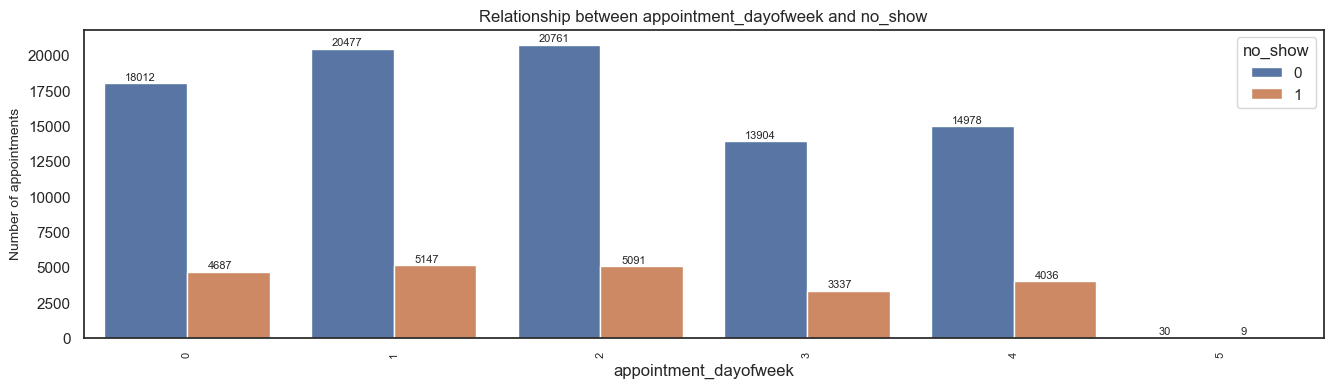

In [44]:
# Plot the distribution of number of patients seen on each day of the week, with show/noshow proportions
plot_relationships(df=df_patients_clean, 
                   x= 'appointment_dayofweek', 
                   y='no_show',
                   annotation=True)

**Observation:**

- Tuesday (1) and Wednesday (2) seems to be slightly more busier days, whilst Thursdays(3) and Fridays(4) are less busy. Saturdays (5) don't have many appointments in relation to other days

- From a proportional perspective, it does not look by first glace that significant more no_shows occur on specific days. Lets plot proportions to confirm this 

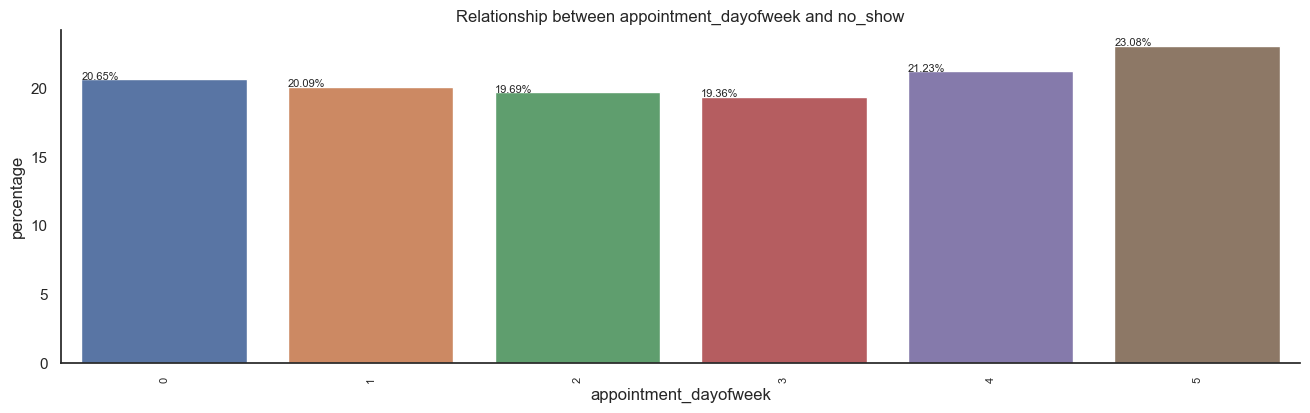

In [45]:
plot_proportions(df=df_patients_clean, 
                 columns=['appointment_dayofweek'], 
                 y='no_show',
                 annotation=True)

**Observation:**

- From Monday to Thursday there are very little variation in no_shows, < 1 percentage point difference.   -
- Friday's (4), have slightly higher noshows than on other days by maximum 2 percentage points
- The huge jump on Saturdays (5) to 23%  looks strange, as the number of appointments on Saturdays are low as per above chart. Let's investigate this deeper

In [46]:
# View appointments that occur on Saturdays
df_patients_clean.query('appointment_dayofweek == 5')

,,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M,age_ranges
,scheduled_date,,,,,,,,,,,,,,,,
72295,2016-05-02,2016-05-14,60,SANTO ANTÔNIO,0,0,0,0,0,1,0,12,15.0,5,1,0,60
72296,2016-05-12,2016-05-14,56,CARATOÍRA,0,0,0,0,0,0,1,2,4.0,5,0,1,60
72297,2016-05-06,2016-05-14,27,CARATOÍRA,1,0,0,0,0,1,0,8,15.0,5,1,0,30
72298,2016-05-02,2016-05-14,75,CARATOÍRA,0,1,1,0,0,0,0,12,15.0,5,0,1,80
72299,2016-05-09,2016-05-14,67,CARATOÍRA,0,0,0,0,0,1,0,5,15.0,5,1,0,70
72300,2016-05-09,2016-05-14,72,CARATOÍRA,0,1,1,0,0,1,0,5,15.0,5,1,0,80
72301,2016-05-09,2016-05-14,52,CARATOÍRA,0,0,1,0,0,1,0,5,15.0,5,0,1,60
72302,2016-05-02,2016-05-14,31,ARIOVALDO FAVALESSA,0,0,0,0,1,1,0,12,15.0,5,0,1,40
72303,2016-05-02,2016-05-14,52,ARIOVALDO FAVALESSA,0,0,0,0,0,0,0,12,15.0,5,1,0,60


**Observation**: All Saturday appointments occur on only 1 day, 2016-05-14, across only a few hospitals. This data looks strange, why only Saturday appointments for this one 1 day? As it's only a handful of records, it looks like an error or some exception.

**Conclusion for question 2**

There are no real significant increases of noshows on specific weekdays. The highest increase are on Fridays with an increase of around 2 percentage points.
Saturday appointments are to be ignored, as it looks like a once-off exception on one specific day '2016-05-14' only

### Research Question 3
### C.3 Which features are the most important to predict if a patient will show up for their scheduled appointment?

#### C.3.1 Detect the features with greatest difference in means between patients showing up vs patients not showing up

In [47]:
# Get list of numerical columns
numerical_cols = list(df_patients_clean.select_dtypes([np.number]).columns.values)
numerical_cols

['age',
 'scholarship',
 'hypertension',
 'diabetes',
 'alcoholism',
 'handicap',
 'sms_received',
 'no_show',
 'time_delay',
 'time_delay_ranges',
 'appointment_dayofweek',
 'gender_F',
 'gender_M',
 'age_ranges']

In [48]:
# Scale the data before calculating mean differences, in order to normalize the data for better comparisons
scaler = MinMaxScaler((0,1))
patients_scaled = scaler.fit_transform(df_patients_clean[numerical_cols])
df_patients_scaled = pd.DataFrame(patients_scaled, columns=numerical_cols)
df_patients_scaled.head()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M,age_ranges
0,0.539130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.545455
1,0.486957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,1.0,0.454545
2,0.539130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.545455
3,0.069565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.000000
4,0.486957,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.454545


In [49]:
# Calculate mean differences
df_patients_mean = df_patients_scaled.groupby('no_show').mean().T
df_patients_mean.columns = ['mean_show', 'mean_noshow']
df_patients_mean['mean_difference'] = abs(df_patients_mean['mean_noshow'] - df_patients_mean['mean_show'])
df_patients_mean = df_patients_mean.sort_values('mean_difference', ascending=False)
df_patients_mean

,mean_show,mean_noshow,mean_difference
time_delay_ranges,0.213357,0.405414,0.192057
sms_received,0.291407,0.438427,0.147021
time_delay,0.048913,0.088470,0.039556
hypertension,0.204499,0.169095,0.035404
age_ranges,0.296769,0.264540,0.032229
age,0.328781,0.298510,0.030271
scholarship,0.093442,0.115255,0.021814
diabetes,0.073875,0.064105,0.009770
gender_F,0.649044,0.653965,0.004921
gender_M,0.350956,0.346035,0.004921


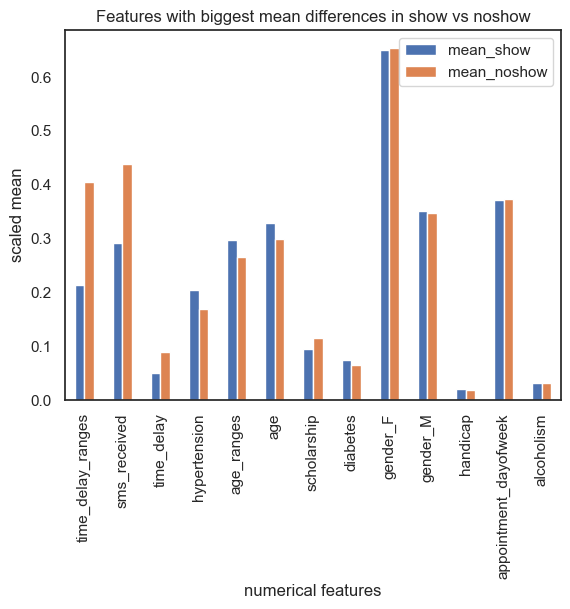

In [50]:
df_patients_mean[['mean_show', 'mean_noshow']].plot(kind='bar', 
                xlabel='numerical features', 
                ylabel='scaled mean', 
                title='Features with biggest mean differences in show vs noshow');

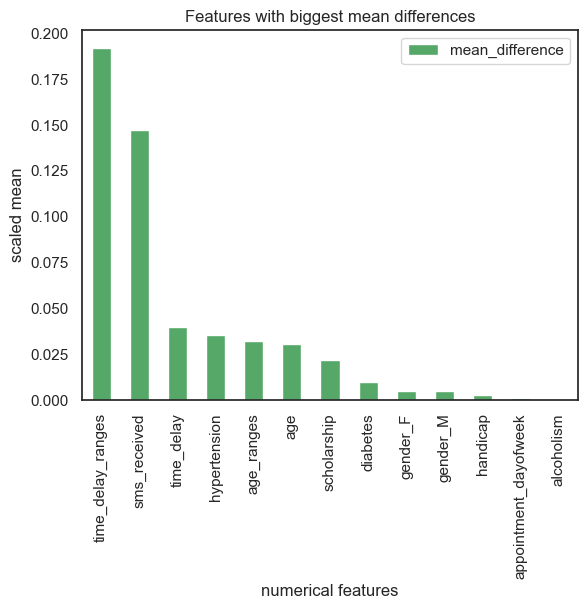

In [51]:
df_patients_mean[['mean_difference']].plot(kind='bar', 
                xlabel='numerical features', 
                ylabel='scaled mean', 
                color='g',
                title='Features with biggest mean differences');
plt.show()

**Conclusion from mean difference:**
- Time_delay, sms_received, hypertension, age and scholarship are the most influential factors that contribute towards patients not showing up
- Alcoholism, day of the week of the appointment (e.g. Monday vs Friday), handicap and gender have little or no influence to predict if patients will show up or not
- Male and female behaviour seems to be similar
- 'time_delay' between making the appointment vs day of appointment have the biggest predictive power. The '_ranges' addition of this feature are perhaps overstated as it contains the upper limit of the range, however think of it's a factor to detect to most influential features instead, and not a real value


#### C.3.2 Correlation analysis with 'no_show'
Lets further investigate feature relationships with show/no_show

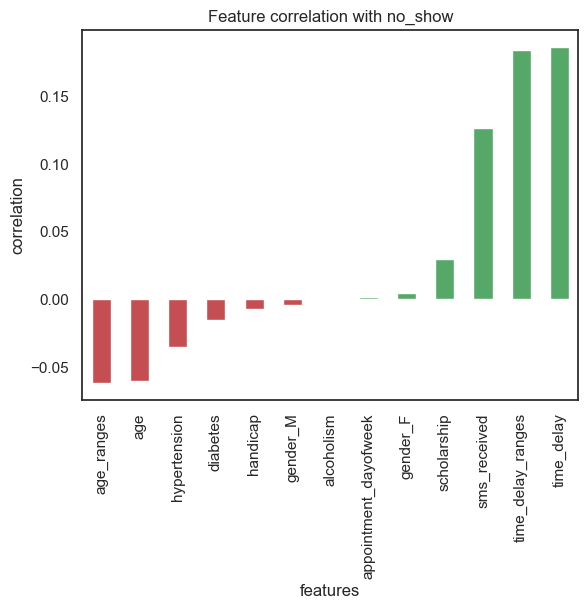

In [52]:
# Get correlation of features with no_show
corr_matrix = df_patients_clean.corrwith(df_patients_clean["no_show"]).sort_values()

# Plot feature correlations to no_show
corr_matrix.drop('no_show', axis=0).plot(kind='bar',
                                        color=np.vectorize({True: 'g', False: 'r'}.get)(corr_matrix > 0))
plt.xticks(rotation='vertical')
plt.ylabel('correlation')
plt.xlabel('features')
plt.title('Feature correlation with no_show')
plt.show()

**Conclusion from correlation with no_show**

We get similar results to C.2 when we compared mean differences

- _'age'_: have the biggest negative correlation, meaning when age goes down, no_show goes up. This suggest that younger patients are more likely to not show up 
- _'hypertension'_: as the 2nd biggest negative correlation, means if hypertension goes up, patients are more likely to show up 
- _'time_delay'_: have the biggest positive correlation, means when the days between making an appointment and attending the appointment goes up, patients are more likely to not show up. 
- _'sms_received'_: even if patients receive an sms, they still do not show up ? The relationship between time delays and receiving sms's need to be deeper analysed below.
- _'scholarship'_: those patients receiving financial help are more likely to not show up ? We need to further explore this relationship

Let's focus deeper on the most influetial features only

#### C.3.3 Correlation analysis between most influential features
To get a general overview of the data, display an pairplot showing the relationships between variables and variable distributions

In [53]:
influential_features = ['age', 'hypertension', 'diabetes', 'handicap', 'scholarship', 'sms_received', 
                        'time_delay', 'no_show']

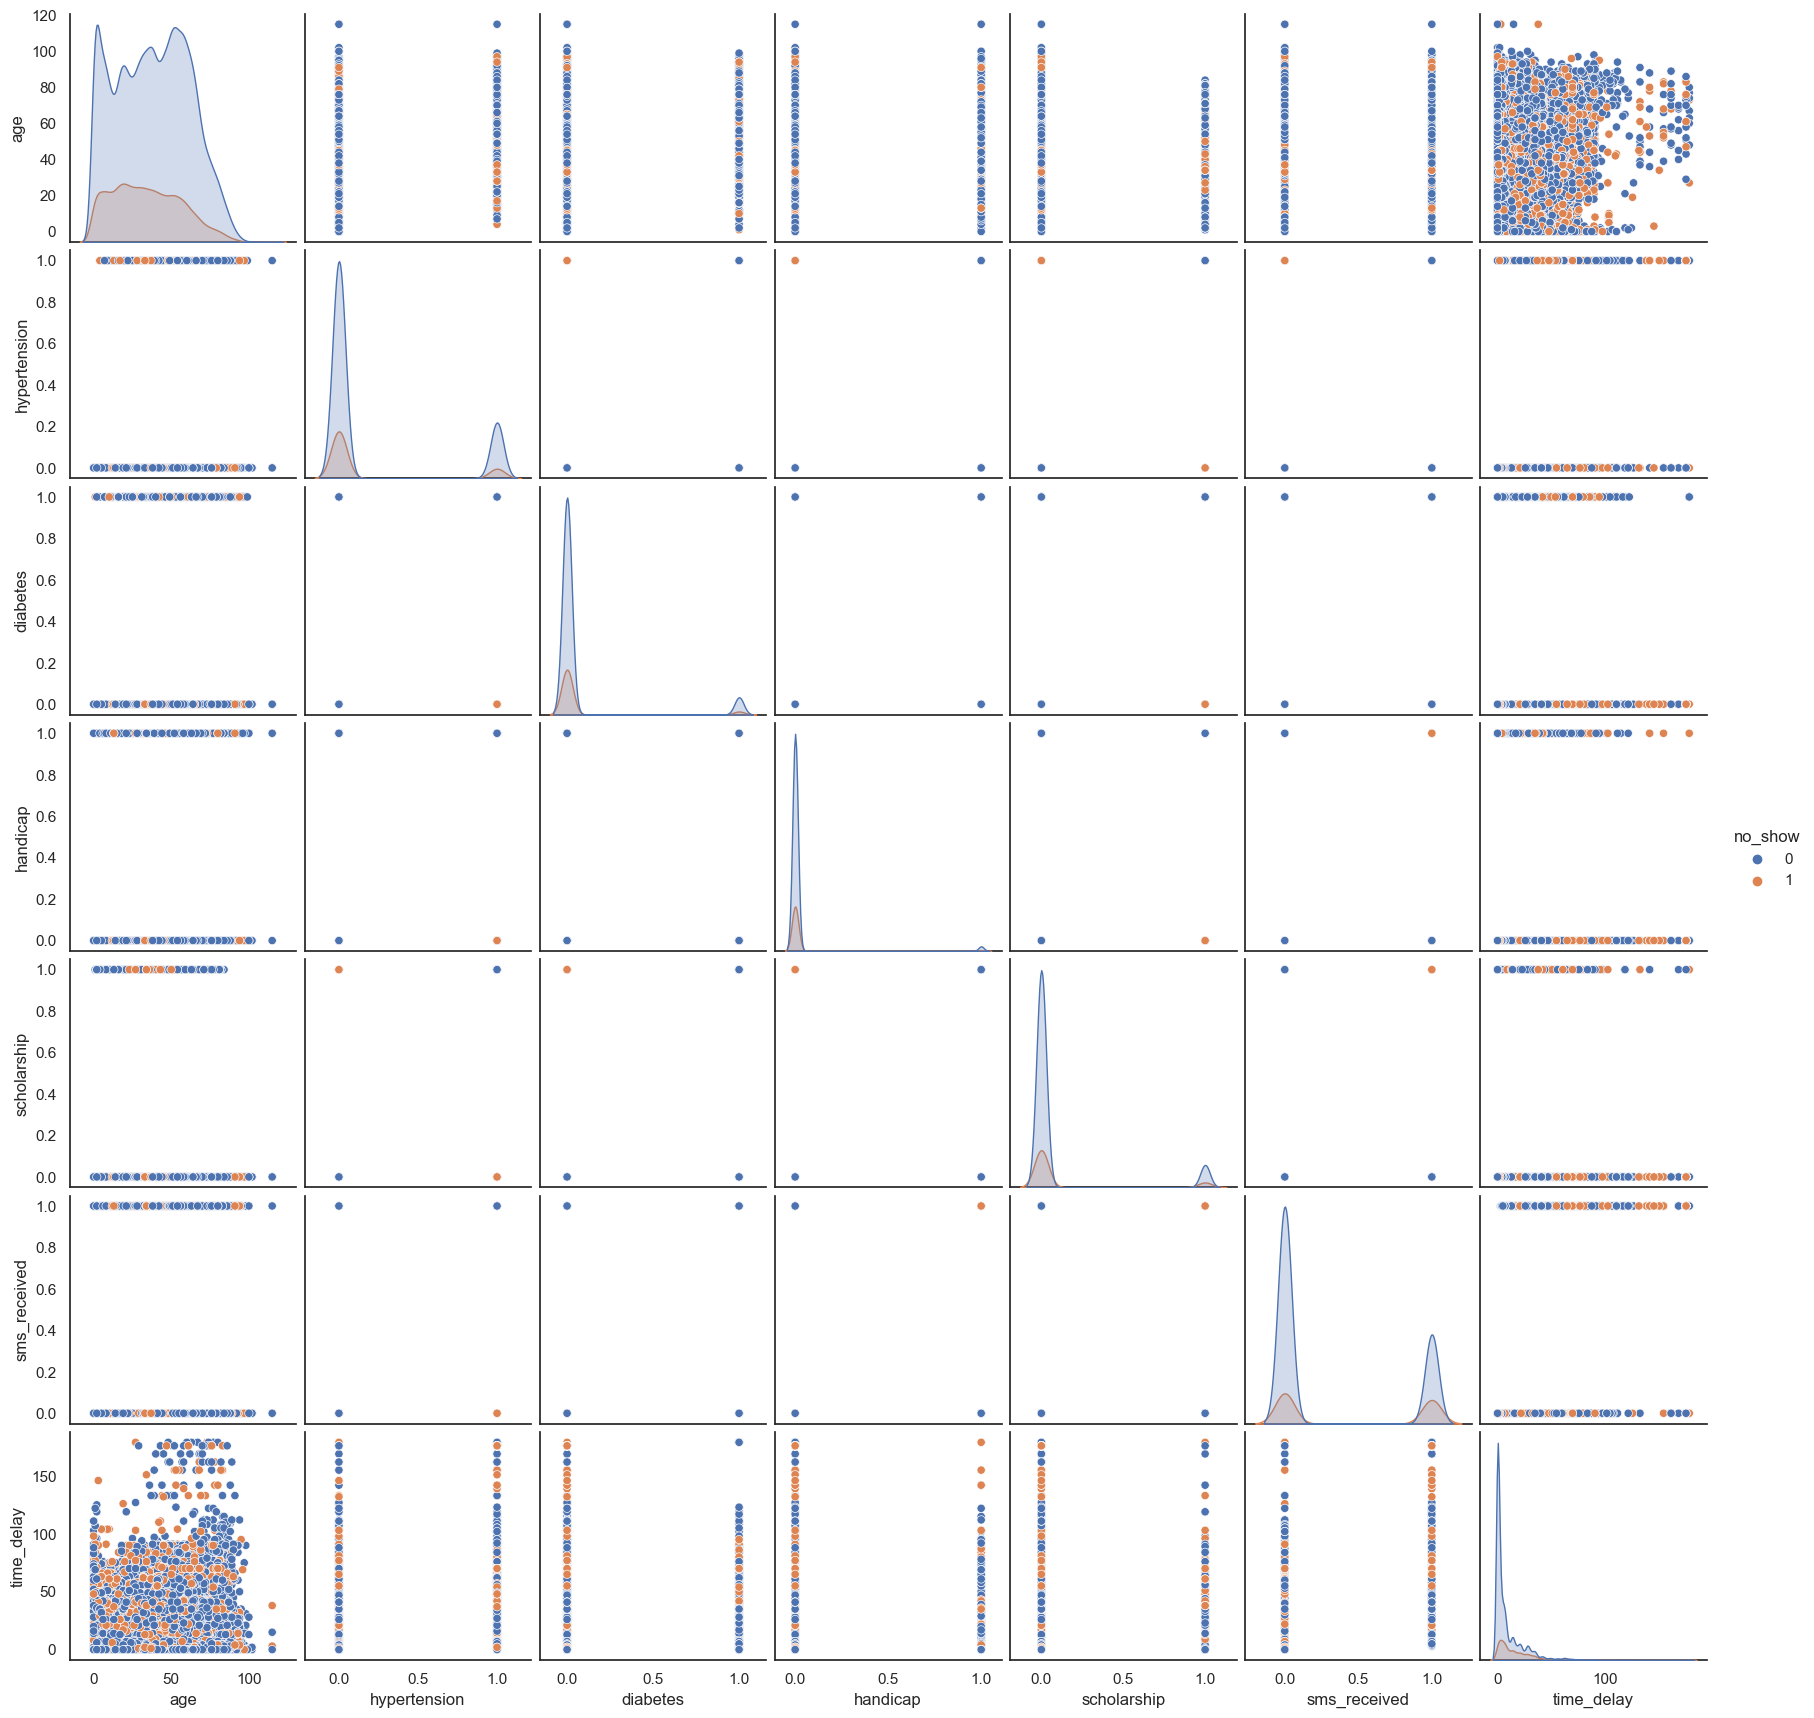

In [54]:
# Let's explore feature distribution and relationships with each other
sns.pairplot(df_patients_clean[influential_features], hue='no_show', kind='scatter', diag_kind='kde');

As it's not easy to see spot all the relationships on the scatter plot clearly due to all the binary features, lets draw a complimentary correlation matrix

In [55]:
corr_matrix = df_patients_clean[influential_features].corr().round(2)

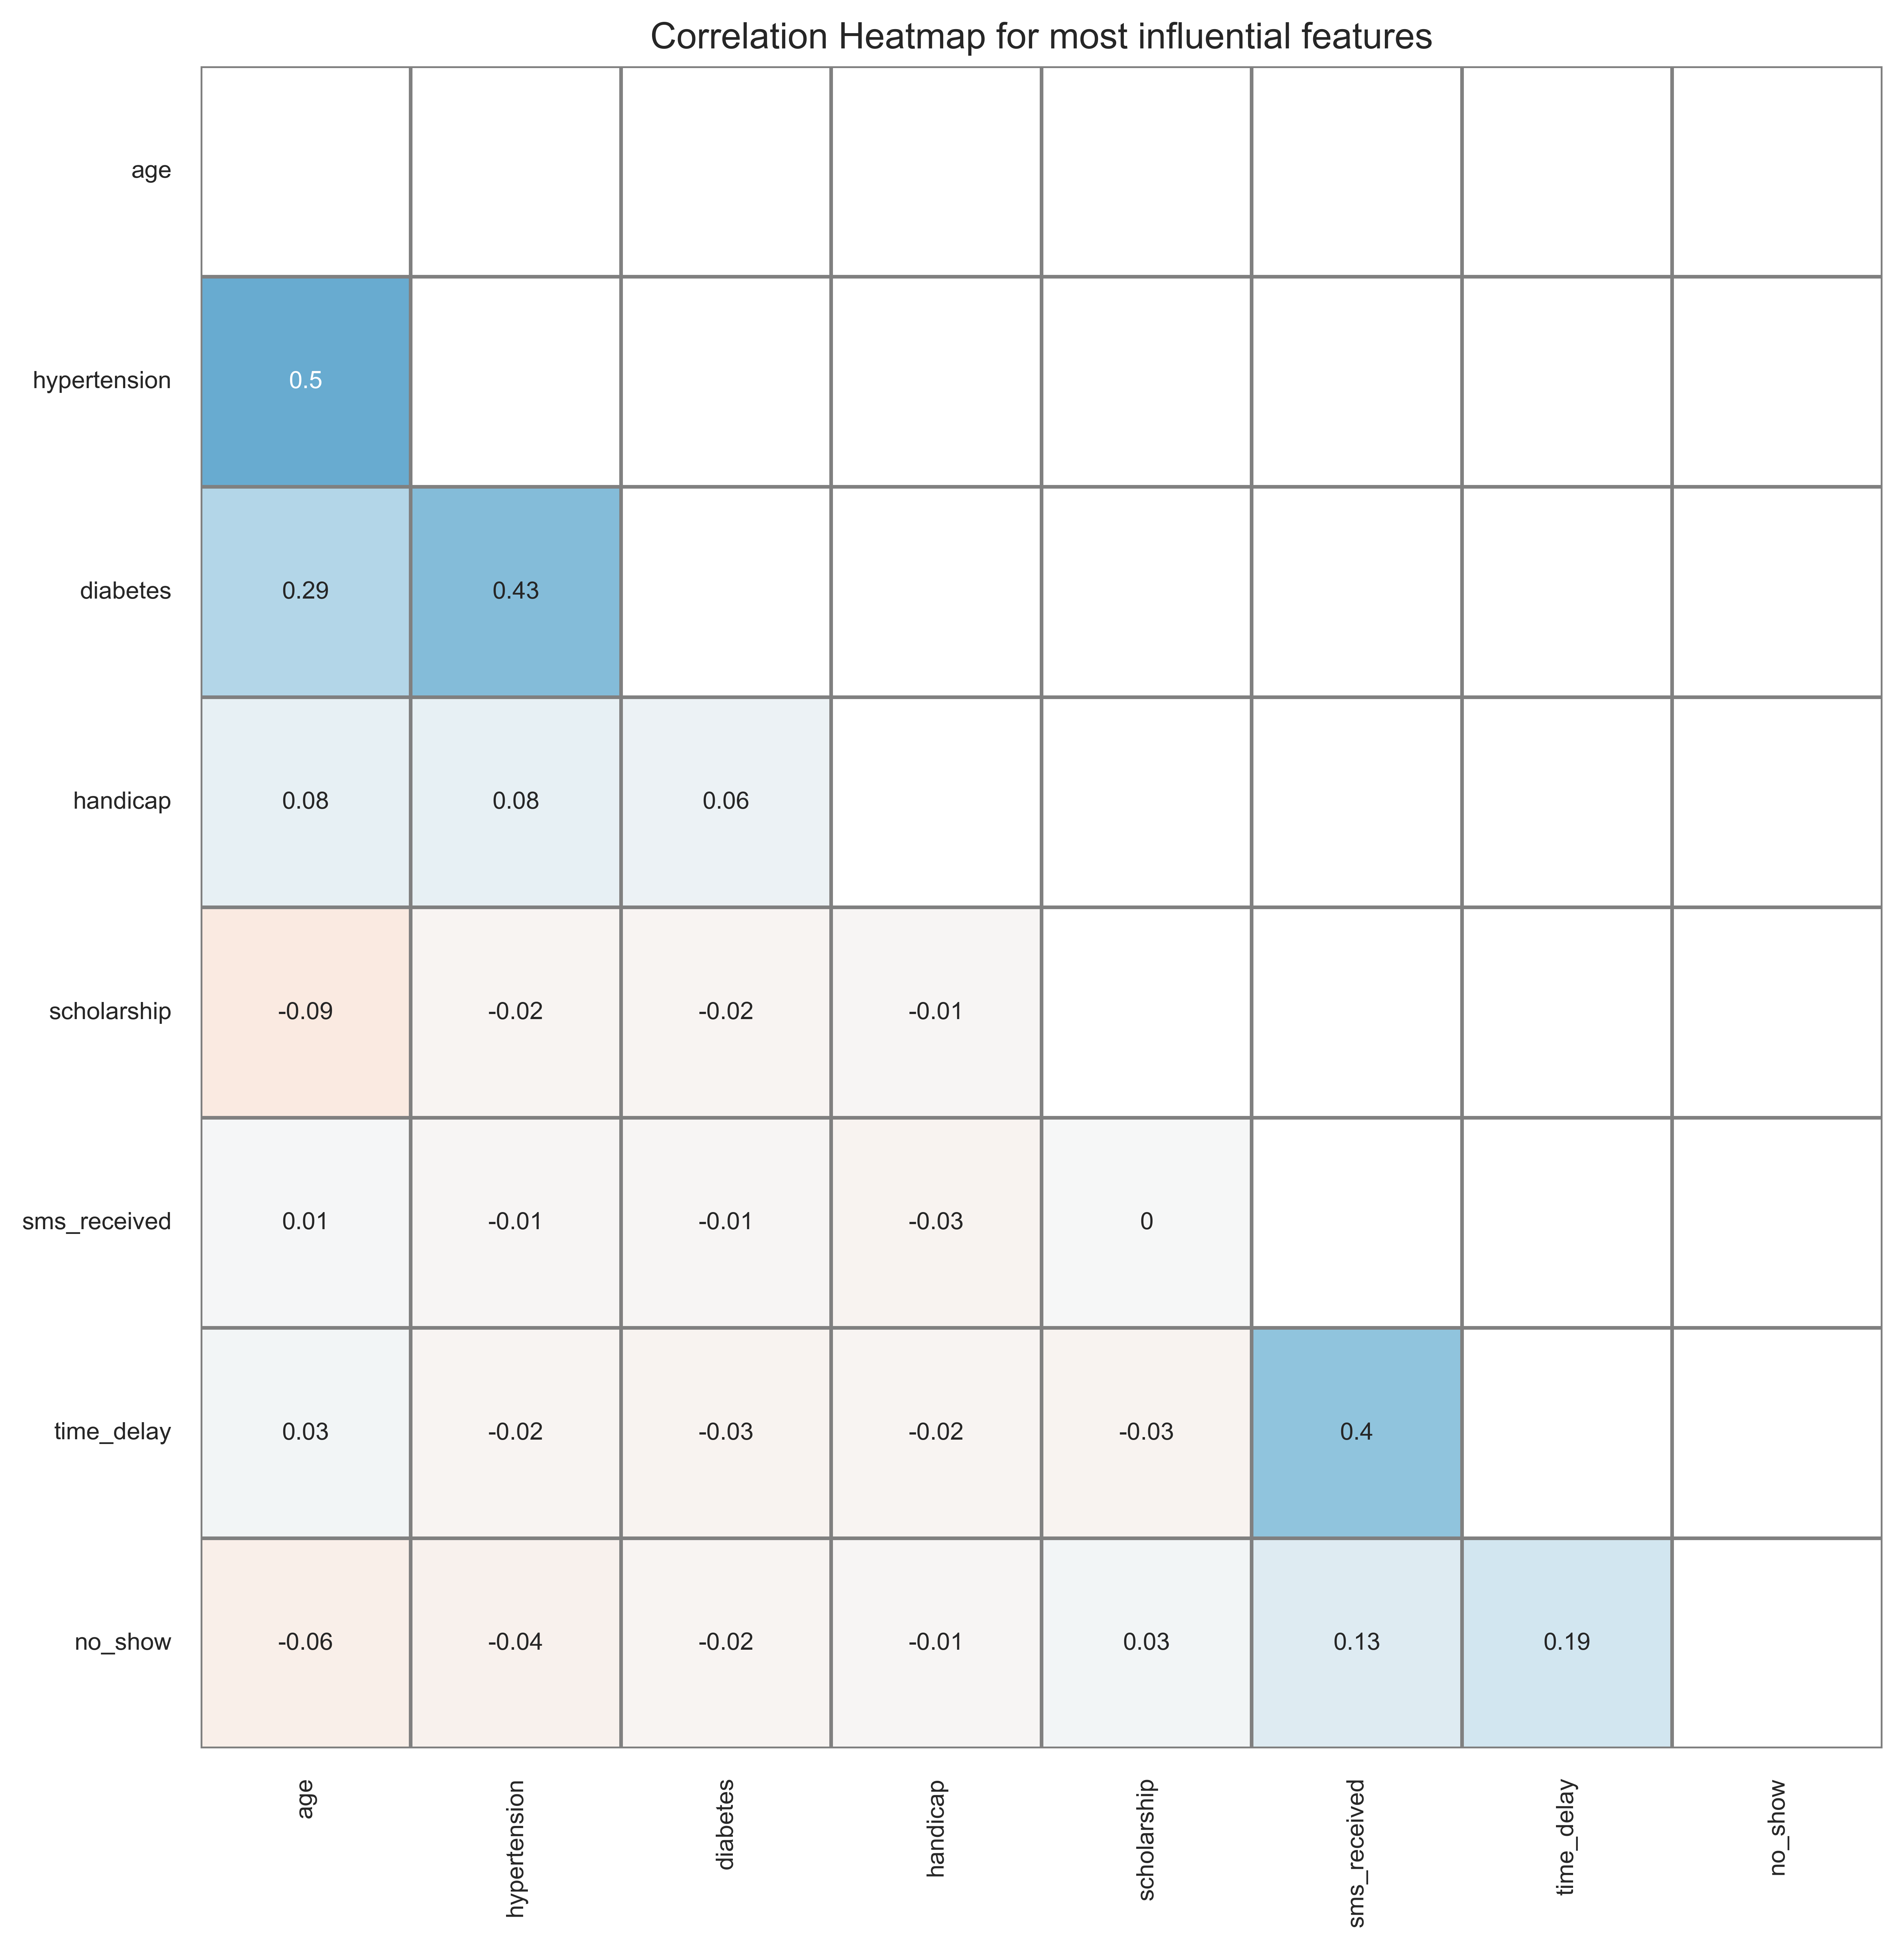

In [56]:
display_correlations(corr_matrix)

**Conclusion from cross feature correlation**:

By looking at the scatter, distribution and correlation charts below, we observe: 
- _age_: Patients not showing up have age shewed to the left, means younger patients are more likely to not show up
- _age/hypertension_: hypertension seems to occur more in older persons, which can explain why patients with hypertension are more likely to show up, as older patients seems more reliable
- _scolorship/age_: scholorships are mostly present in middle age groups 20-60 years. Means it's more younger patients that receive scholorships
- hypertension/diabetes: there seem to be a positive correlation between diabetes and hypertension
- time_delay/sms_received: there seem to be a strong relationship between time delay and sms received that needs to be further investigated

Let's explore some of these relationships a bit deeper


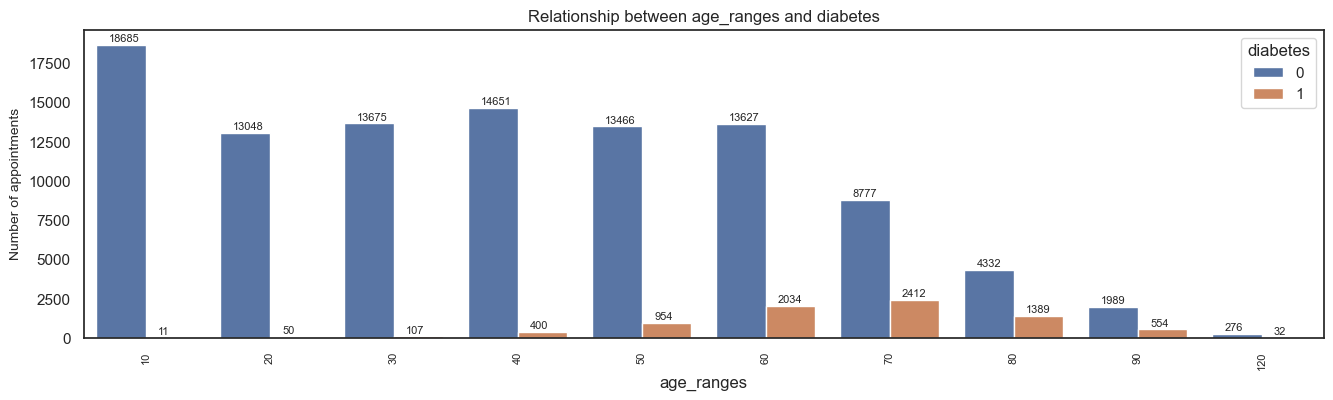

In [57]:
# show relationship between age ranges and diabetes
plot_relationships(df_patients_clean, 'age_ranges', 'diabetes', annotation=True)

We can observe that diabetes are mostly present in older patients between 40 - 90 years, peaking at 70 years

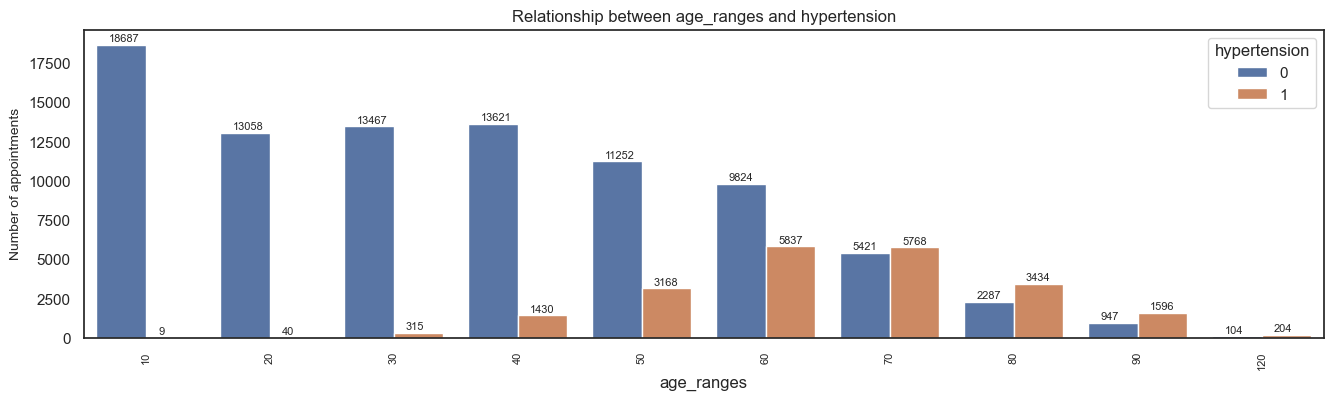

In [58]:
# show relationship between age ranges and hypertension
plot_relationships(df_patients_clean, 'age_ranges', 'hypertension', annotation=True)

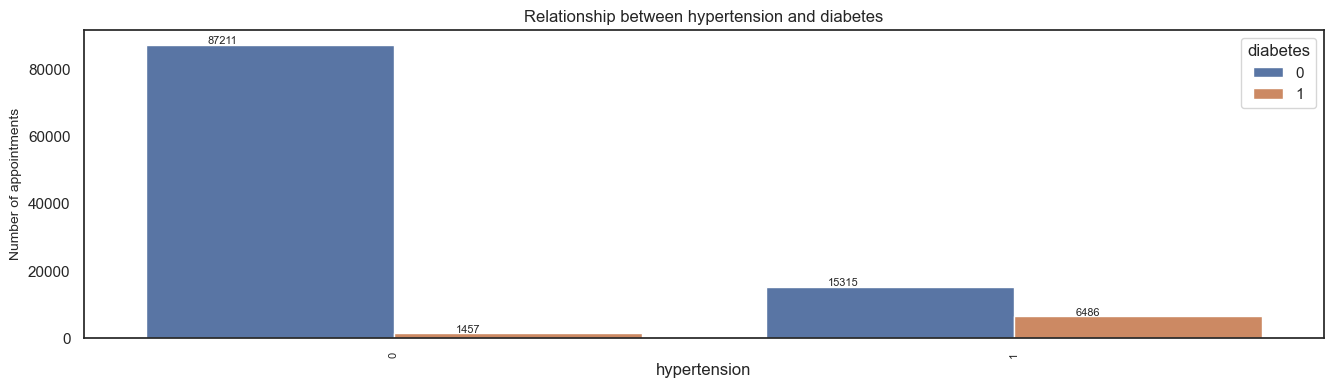

In [59]:
# show relationship between hypertension and diabetes
plot_relationships(df_patients_clean, 'hypertension', 'diabetes', annotation=True)

Hypertension (high blood pressure) are more frequent in patients with diabetes compared with those who do not have diabetes. 

posx and posy should be finite values
posx and posy should be finite values


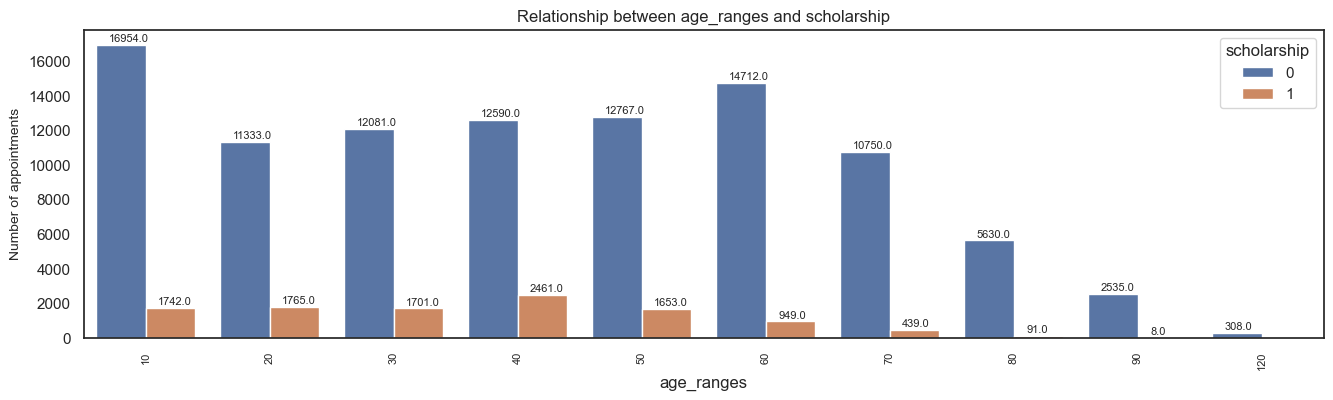

In [60]:
# show relationship between age ranges and scholorship
plot_relationships(df_patients_clean, 'age_ranges', 'scholarship', annotation=True)

We can observe that scholarships are present in younger patients below 60 years

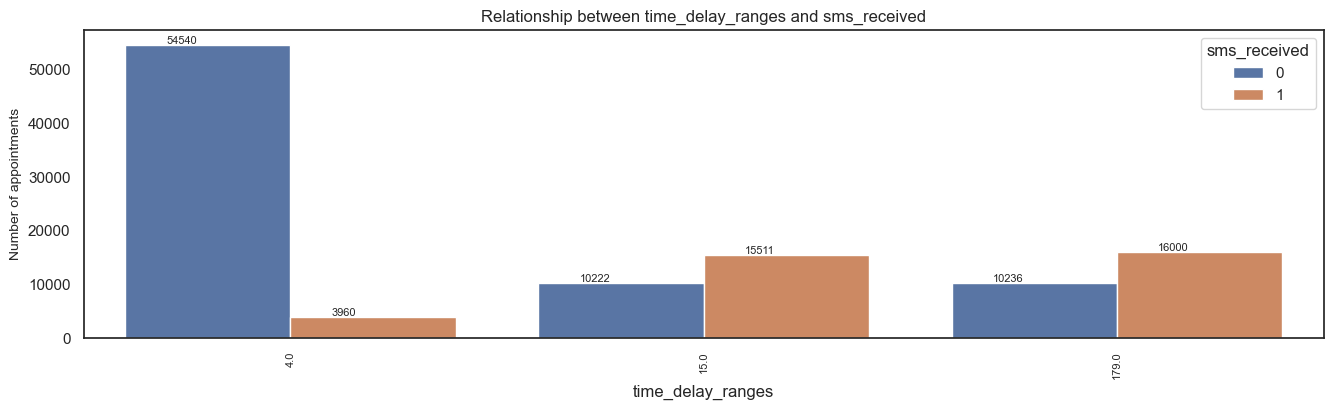

In [61]:
# show relationship between time delay ranges and sms_received
plot_relationships(df_patients_clean, 'time_delay_ranges', 'sms_received', annotation=True)

We can observe patients with longer waiting times for their appointments receive more sms reminders

#### C.3.4 Inspect deceases relationship to no_show

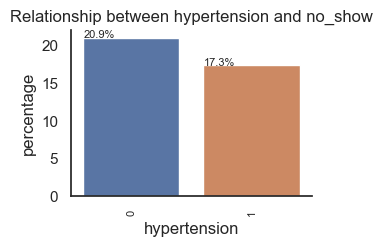

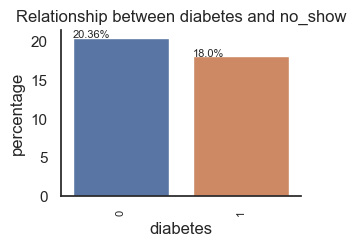

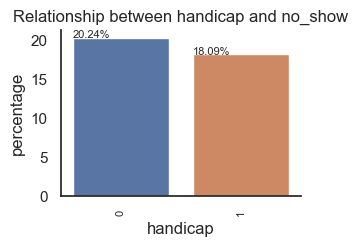

In [62]:
decease_features = ['hypertension', 'diabetes', 'handicap']
plot_proportions(df=df_patients_clean, columns=decease_features, y='no_show', annotation=True)

**Conclusion from deceases and no_show**

Patients with mentioned deceases are slighly more likely to show up by about 2-3 percentage points

**Final conclusion:**
- Most influential features to predict noshows are time_delay, sms_received, hypertension, age and scholarship.
    - time_delay: The longer patients wait for their appointments, the more likely it is they will not show up by around 18%
    - age: Patients not showing up are younger
    - hypertension/diabetes: Patients with deceases like hypertension and diabetes are older (>40 years), and show up more frequently by 2-3%. 
    - sms_received can be perceived as an indirect influence and have a strong relationship with time_delay. Patients with longer waiting time for appointments get more sms reminders

### Research Question 4 
### C.4 Which age group are most likely to not show up?

In [63]:
# split dataset between patients showing up vs patients not showing up
df_show = df_patients_clean.query('no_show == 0').copy().reset_index(drop=True)
df_noshow = df_patients_clean.query('no_show == 1').copy().reset_index(drop=True)
print('no_show shape: {} \nshow shape: {}'.format(df_noshow.shape, df_show.shape))

no_show shape: (22307, 16) 
show shape: (88162, 16)


In [64]:
age_show = df_show.groupby('age_ranges')['age_ranges'].count()
age_show.head(20)

age_ranges
10     14916
20      9791
30     10389
40     11820
50     11550
60     12940
70      9541
80      4832
90      2137
120      246
Name: age_ranges, dtype: int64

In [65]:
age_noshow = df_noshow.groupby('age_ranges')['age_ranges'].count()
age_noshow.head(20)

age_ranges
10     3780
20     3307
30     3393
40     3231
50     2870
60     2721
70     1648
80      889
90      406
120      62
Name: age_ranges, dtype: int64

In [66]:
age_sum = pd.concat([age_noshow, age_show], axis=1)
age_sum.columns = ['noshow', 'show']
age_sum['%noshow'] = age_sum['noshow'] / (age_sum['noshow'] + age_sum['show']) * 100
age_sum

,noshow,show,%noshow
age_ranges,,,
10,3780,14916,20.218228
20,3307,9791,25.248129
30,3393,10389,24.619068
40,3231,11820,21.467012
50,2870,11550,19.902913
60,2721,12940,17.374369
70,1648,9541,14.728751
80,889,4832,15.539241
90,406,2137,15.965395


In [67]:
age_sum.describe()

,noshow,show,%noshow
count,10.000000,10.0000,10.000000
mean,2230.700000,8816.2000,19.519298
std,1363.487363,4814.2488,3.646160
min,62.000000,246.0000,14.728751
25%,1078.750000,6009.2500,16.317639
50%,2795.500000,10090.0000,20.016391
75%,3288.000000,11752.5000,21.154816
max,3780.000000,14916.0000,25.248129


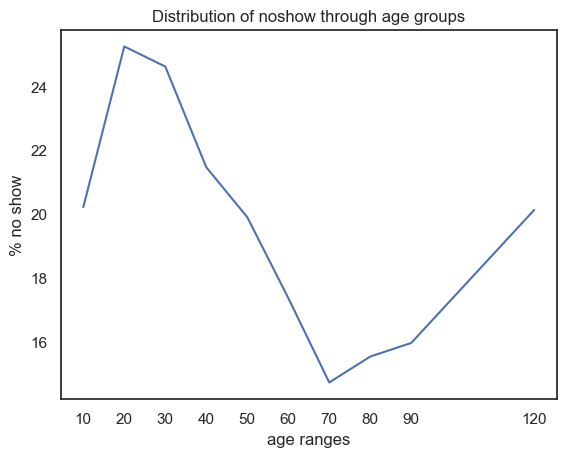

In [68]:
age_sum['%noshow'].plot(kind='line', 
                        xlabel='age ranges', 
                        ylabel='% no show', 
                        xticks=age_sum.index,
                        title='Distribution of noshow through age groups');

**Conclusion:**

- The % noshow per 10 year interval, range from 15% - 25%
- The age group with biggest noshows are 10-20 years with 25% noshows
- The age gropu with lowest noshows are 60-70 years with 15% noshows
- In general it seems like younger patients from 11 - 40 years old are more likely to not show up. 

### Research Question 5
### C.5 Are no shows related to certain hospitals ?

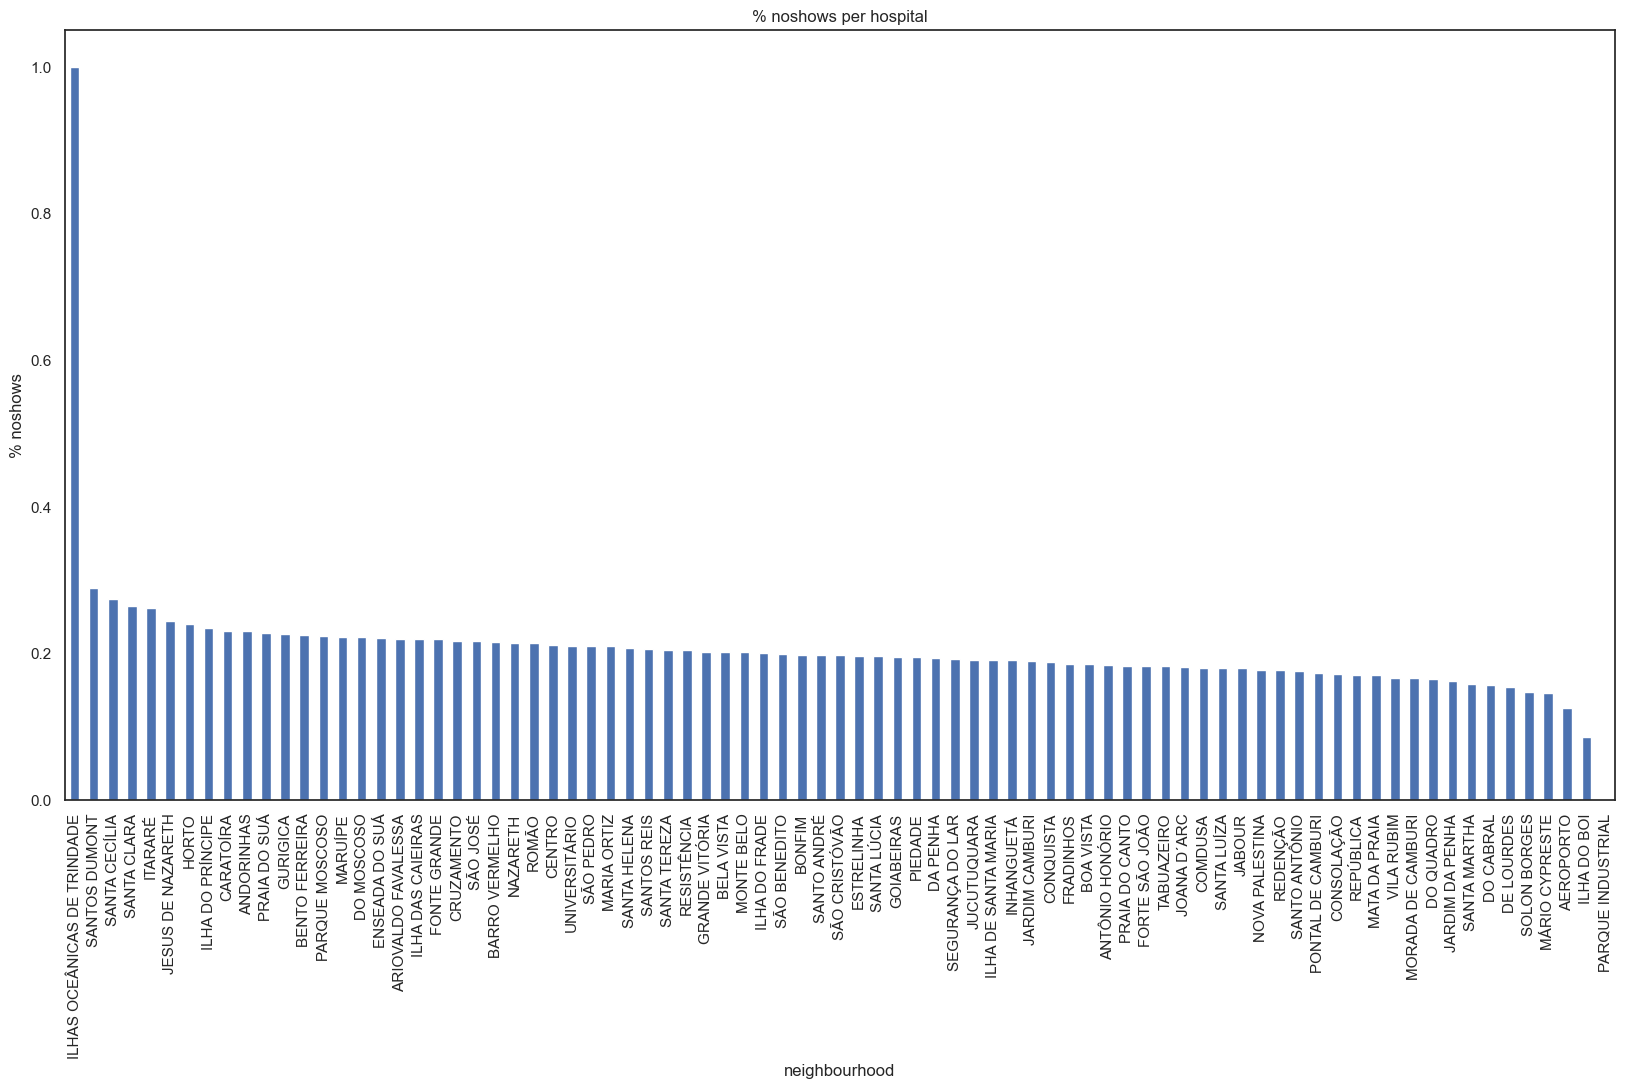

In [69]:
# calculate show/noshow proportions
df_neighbourhood = df_patients_clean.groupby(['neighbourhood'])['no_show'].mean()
df_neighbourhood.sort_values(ascending=False).plot(kind='bar', 
                                                   figsize=(20,10), 
                                                   ylabel='% noshows', 
                                                   title='% noshows per hospital');

In [70]:
# Get index of neighbourhood with maximum % no_shows
idx = df_neighbourhood.idxmax()
idx

'ILHAS OCEÂNICAS DE TRINDADE'

In [71]:
df_patients_clean.query('neighbourhood == @idx')

,,appointment_date,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_delay,time_delay_ranges,appointment_dayofweek,gender_F,gender_M,age_ranges
,scheduled_date,,,,,,,,,,,,,,,,
48754,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,29,179.0,4,1,0,60
48765,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,29,179.0,4,1,0,60


**Conclusion:**

The average noshows per hospital vary between 20 - 30%. The no show problem seems to distributed across hospitals fairly consistently. It's not that certain hostpitals cause the issue specifically

The top entry 'ILHAS OCEÂNICAS DE TRINDADE' where 100% of patients do not show up, can be ignored, as only 2 datapoints exist for this hospital

<a id='conclusions'></a>
## D. Conclusions

The goal of the project was to try to predict which kind of patients do not show up for their medical appointments.

*Note:* To pass the project requirements, it was not required to use inferential statistics or machine learning, but rather to demostrate data analysis skills of questioning, wrangling, exploring, analysing and communicating the results using numpy, pandas, matplotlib and seaborn libararies.
The findings are thus tentative and a pre-step prior machine learning. This project is open-ended in that it's not looking for one right answer.

### D1. Accessing

Data supplied by kaggle contained 14 features describing patients and their appointments. The features are mostly categorical, with the exception of the age of the patient.

The data was first accessed by looking at sample row data for first impressions, checking for duplicates and inspecting the unique values of each feature to determine the correct data types that should be used, and to scan each feature for errors in values. 

### D2. Cleaning
The following cleaning activities were identified and performed:

- 1) Patient Id and Appointment Id are identifiers/keys. Drop this data as it's not needed for the analysis
- 2) Improve column headings 
- 3) Convert ScheduledDay and AppointmentDay to datetime format and drop the time. Appointment day has no time included in the data, therefore the value of time in appointment day is assumed to be of little importance
- 4) Introduce new feature 'time_delay' which are the days passed between making an appointment and the appointment day itself. 
- 5) Introduce new feature 'appointment_dayofweek' which represent the day of the week of the appointment (e.g. Monday vs Friday). 
- 6) No-show: Change to binary indicator 1, 0 as well to fit with other binary columns. '1' means patient did not show up
- 7) Change 'gender' to binary indicator as well using 'get_dummies' function, in order to visualize relationships between other variables better
- 8) Age: Drop age = -1. Analyse values = 0, asssuming these are new born babies. Build subranges and review distributions
- 9) Binarize handicap, as in general there are very little no_shows for increased number of disabilities 

### D3. Exploration and Findings

The cleaned data was first explored using descriptive statistics and displaying distributions of each feature with a histogram. 

**General findings**:
- Patients are younger with mean age of 37
- Not a lot of patients have deceases like hypertension (<20%), diabetes(<7%), alcoholism(<3%) and disabilities (<15%)
- 10% patients receive goverment grants/scholarship
- 20% of patients do not show up for their appointments
- Average time delay for appointments is 10 days, whilst 50% of patients wait <= 4 days
- We have 65% female patients and 35% male patients

After exploring the data, the following questions were answered through analysis:

#### D.2.1) Does patient noshows increase when the waiting time for the appointment increase ?

- During the cleaning step, time delays in days were calculated between the scheduled date and the appointment date and represent the waiting time for an appointment.
- A new time delay interval feature was introduced calculated from percentiles and consist of ranges 0-4 days, 5-15 days, 16-179 days
- A bar chart was used to plot show vs noshows for each for the time intervals

**Final conclusion:**

The percentage of noshows increases as the waiting time for appointments increase. We see a jump from 11% to 29% when the time delay increases from 0-4 days to 5-15 days, which is quite significant.


#### D.2.2) Do no show's occur more on specific weekdays ?

During the cleaning step, a new feature 'dayofweek' was introduced. 
Bar charts were used to plot the number of appointments and their proportions for each day of the week

Saturdays don't have many appointments in relation to other days, yet showed the highest 23% noshow ratio. Upon further investigation, appointments on Saturday only occurred against one single date '2016-05-14', which can be seen as an exception or error.

**Final conclusion:**

There are no real significant increases of noshows on specific weekdays from Monday to Friday. The highest rise in noshow are on Fridays with an increase of around 2 percentage points. 


#### D.2.3) What features are the most important to predict if a patient will show up for their scheduled appointment?

The general approach was to first discover those features with the most predictive power.

The analysis was focused on numerical features and was split into 4 main parts:
  1. Calculate mean difference for each numeric feature between show and noshow appointments using bar plots  
  2. Feature correlation analysis with 'no_show' using bar plots
  3. Cross feature correlation for top influencing features using correlation triangle
  4. Exploring further some relationships between features using bar charts to get deeper insights based on findings in step 1-3

During step 1 and 2, the top influening features were first identified. Rest of steps focused only the top influencing features from multiple angles.


**Final conclusion:**
- Top influential features to predict noshows are time_delay, sms_received, hypertension, age and scholarship.
    - time_delay: The longer patients wait for their appointments, the more likely it is they will not show up by around 18%
    - age: Patients not showing up are younger
    - hypertension/diabetes: Patients with deceases like hypertension and diabetes are older (>40 years), and show up more frequently by 2-3%. 
    - sms_received can be perceived as an indirect influence and have a strong relationship with time_delay. Patients with longer waiting time for appointments get more sms reminders

- Alcoholism, day of the week of the appointment (e.g. Monday vs Friday), handicap and gender have little or no predictive power
- Male and female behaviour are similar



#### D.2.4) Which age group are most likely to not show up?

During the cleaning step, a new feature 'age_ranges' were introduced to help us summarize plots in 10 year intervals

A line chart was used to show the % noshows for each age interval. We observed a sharp rise in noshows in younger patients

**Final Conclusion:**

- The % noshow per 10 year interval, range from 15% - 25%
- The age group with biggest noshows are 10-20 years with 25% noshows
- The age group with lowest noshows are 60-70 years with 15% noshows
- In general it seems like younger patients from 11 - 40 years old are more likely to not show up. 

#### D.2.5) Are no shows related to certain hospitals ?

The % of noshows for each hospital was plotted on a bar chart

**Final Conclusion:**

The average noshows per hospital vary between 20 - 30%. The no show problem seems to distributed across hospitals fairly consistently. It's not that certain hostpitals cause the issue specifically


### D.4 Limitations

**Handicap:**
Kaggle Documentation describe the handicap feature incorrectly. There are several versions of what this feature really mean. The documentation expected values are 'True'/'False', however the dataset contain values 0 - 4.
Based on [this issue](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) raised by other students, I interpretted the feature as:
0 = no disability
1 = 1 disability
2 = 2 disabilities
3 = 3 disabilities
4 = 4 disabilities

**Age:**
It's not clear from the documentation if age = 0 are new born babies, this was assumed.
There are patients over 100 years old, the oldest 115 years which might be a mistake, although the records were left as this affected only a few patients.

**Saturday appointments:**
Appointments on Saturday occur for only 1 day on 2016-05-04 for only a few hospitals, compared to the 27 days in the dataset. This looks strange, therefore validity of the data is here questioned.

**Appointment sample:**
Only 1 month of actual appointment data was given. To make accurate predictions the sample size is too small, more data should be considered to discover trends more accurately especially across seasons, weekday vs weekends, etc.

**Missed appointments:**
Young patients 0-20 years old, miss the most appointments. These patients would rely on their parents to bring them to the doctor. Not enough information is present to make accurate conclusions why these very young patients miss their appointments as deceases like diabetes and hypertension occur more in older patients. It's more the parent that miss the appointment not the child. Perhaps a link between parent and child patients cold be helpful.

**Scholarships:**
Some records were suspicious, where patients with age = 0 (newborn babies) have scholorshops = Yes. I assume it would be their parents that receive the goverment grant, not the babies themselves? These records were deleted as it's assume to be a mistake.



### D.5 Next steps:

Use a machine learning algorithm like XGBOOST classifier to perform a more accurate prediction using machine learning 


# References
https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group